#Bibliotecas

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from collections import Counter
import statistics as static

#Importação dos dados

In [3]:
#importação dos dados
url = 'https://raw.githubusercontent.com/GSilva04/Projeto_Integrador_2022/main/dados/ocorrencias_cenipa.csv'
dados = pd.read_csv(url)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5242 entries, 0 to 5241
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo                     5242 non-null   int64 
 1   tipo                       5242 non-null   object
 2   descricao                  5242 non-null   object
 3   cidade                     5242 non-null   object
 4   estado                     5242 non-null   object
 5   data                       5242 non-null   object
 6   ano                        5242 non-null   int64 
 7   hora                       5242 non-null   object
 8   aeronave_liberada          5242 non-null   object
 9   status_investigacao        5242 non-null   object
 10  aeronaves_envolvidas       5242 non-null   int64 
 11  ocorrencia_saida_pista     5242 non-null   object
 12  aeronave_tipo              5242 non-null   object
 13  aeronave_fabricante        5242 non-null   object
 14  motor_ti

In [176]:
dados.describe()

,codigo,ano,aeronaves_envolvidas,aeronave_assentos,aeronave_ano_fabricacao
count,5242.000000,5242.000000,5242.000000,5242.000000,5242.000000
mean,56472.458985,2014.180847,1.011828,27.575353,1863.320870
std,13045.616926,2.849750,0.111593,54.528085,507.051481
min,39115.000000,2010.000000,1.000000,0.000000,0.000000
25%,46024.500000,2012.000000,1.000000,2.000000,1978.000000
50%,51693.500000,2014.000000,1.000000,6.000000,1992.000000
75%,66450.750000,2017.000000,1.000000,10.000000,2007.000000
max,79227.000000,2019.000000,3.000000,384.000000,9999.000000


In [7]:
dados.head()

,codigo,tipo,descricao,cidade,estado,data,ano,hora,aeronave_liberada,status_investigacao,...,ocorrencia_saida_pista,aeronave_tipo,aeronave_fabricante,motor_tipo,aeronave_motor_quantidade,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_fase_operacao,aeronave_nivel_dano
0,40107,ACIDENTE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,GURUPÁ,PA,2010-01-12,2010,14:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,PISTÃO,MONOMOTOR,7,1977,BRASIL,POUSO,LEVE
1,40147,ACIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,UNIÃO DA VITÓRIA,PR,2010-04-08,2010,14:20:00,SIM,FINALIZADA,...,SIM,AVIÃO,PIPER AIRCRAFT,PISTÃO,BIMOTOR,6,1997,BRASIL,POUSO,SUBSTANCIAL
2,40148,ACIDENTE,PANE SECA,CAMPO GRANDE,MS,2010-03-19,2010,19:30:00,SIM,FINALIZADA,...,NÃO,AVIÃO,CESSNA AIRCRAFT,PISTÃO,MONOMOTOR,6,1962,BRASIL,APROXIMAÇÃO FINAL,SUBSTANCIAL
3,40149,ACIDENTE,FALHA DO MOTOR EM VOO,LUZIÂNIA,GO,2010-03-21,2010,20:45:00,SIM,FINALIZADA,...,NÃO,AVIÃO,XAVANTE,PISTÃO,MONOMOTOR,2,1974,BRASIL,DECOLAGEM,DESTRUÍDA
4,40150,INCIDENTE GRAVE,COM TREM DE POUSO,SANTA MARIA,RS,2010-03-10,2010,17:20:00,SIM,FINALIZADA,...,NÃO,AVIÃO,BEECH AIRCRAFT,PISTÃO,MONOMOTOR,6,1974,BRASIL,POUSO,LEVE


A partir das informações exibidas acima temos informações relevantes de que o estado de SP, é com grande diferença o estado que mais teve acidentes neste período, com 1239 ocorrências.

#Quantidade de Ocorrências

#Por tipo de ocorrência

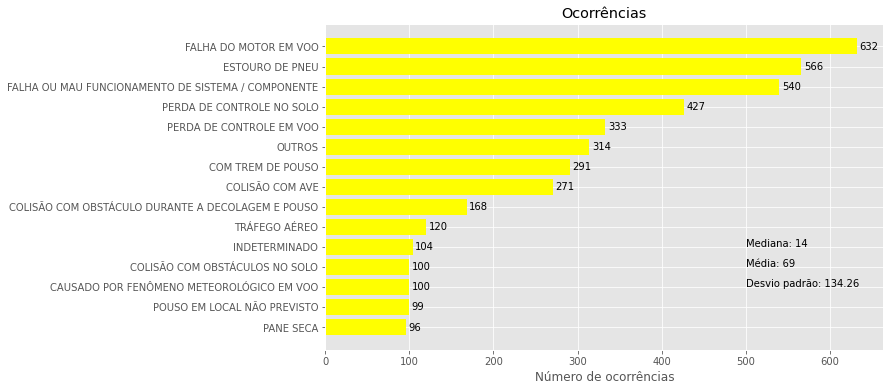

In [201]:
desc = Counter(dados['descricao'])
fase_desc = sorted(desc, key = desc.get, reverse = True)
cont_desc = sorted(list(desc.values()), reverse = True)
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(10, 6))

x=fase_desc[:15]
y=cont_desc[:15]

ax.barh(x, y, color='yellow')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências')
plt.title('Ocorrências')
plt.text(500, 10, 'Mediana: %d'%(np.median(np.array(cont_desc))))
plt.text(500, 11, 'Média: %d'%(np.mean(np.array(cont_desc))))
plt.text(500, 12, 'Desvio padrão: %.2f'%(static.stdev(cont_desc)))

plt.show()

Nota-se que os problemas encontrados nas primeiras posições, teriam um índice menor de problemas caso regras como a vistoria em tempo recomendado da parte estruturais e mecânicas fossem respeitadas, procedimento que hoje é falho e conhecido por todos.

A média no período foi de 69 ocorrências.

Dentre as que menos causam ocorrências pode-se destacar a ocorrência por Explosão, que somente contém uma ocorrência em todo este período.


##Por horário

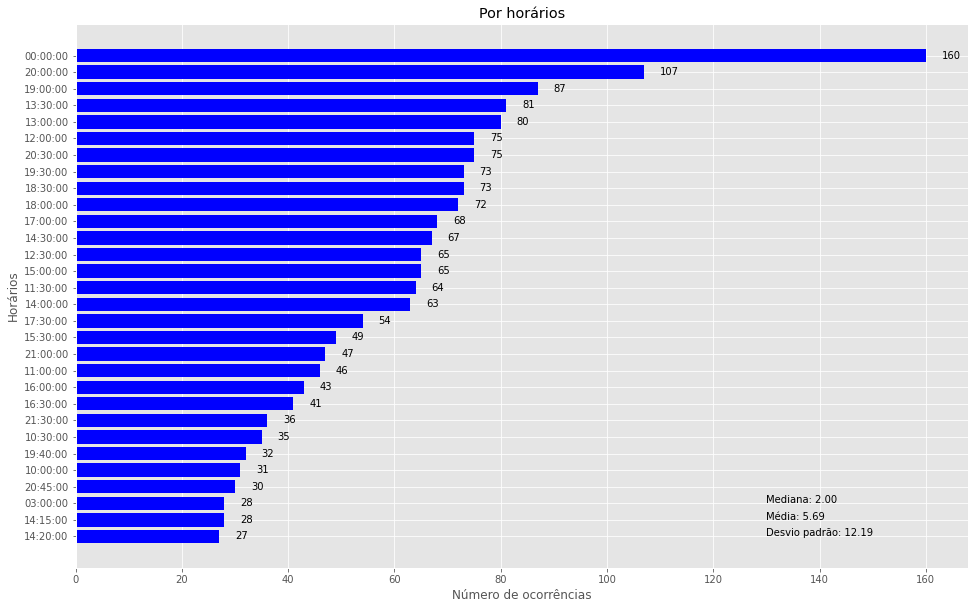

In [137]:
hora = Counter(dados['hora'])
fase_hora = sorted(hora, key = hora.get, reverse = True)
contador_hora = sorted(list(hora.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(16, 10))

x=fase_hora[:30]
y=contador_hora[:30]

ax.barh(x, y, color='b')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()

plt.xlabel('Número de ocorrências')
plt.ylabel('Horários')
plt.title('Por horários')

plt.text(130, 27, 'Mediana: %.2f'%(np.median(np.array(contador_hora))))
plt.text(130, 28, 'Média: %.2f'%(np.mean(np.array(contador_hora))))
plt.text(130, 29, 'Desvio padrão: %.2f'%(static.stdev(contador_hora)))

plt.show()

Nota-se uma maior concentração de ocorrências no período noturno e diurno vespertino, visivelmente nos horários da 00h e 20h, com ambos totalizando 267 ocorrências.
A média de ocorrências por horário foi de 5,69.


## Por motor

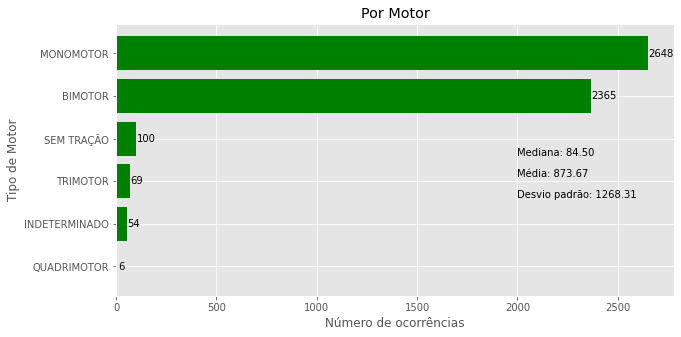

In [139]:
motor_qtde = Counter(dados['aeronave_motor_quantidade'])
fase_qtde = sorted(motor_qtde, key = motor_qtde.get, reverse = True)
cont_qtde = sorted(list(motor_qtde.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(10, 5))

x=fase_qtde[:20]
y=cont_qtde[:20]

ax.barh(x, y, color='g')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()

plt.xlabel('Número de ocorrências')
plt.ylabel('Tipo de Motor')
plt.title('Por Motor')

plt.text(2000, 2.4, 'Mediana: %.2f'%(np.median(np.array(cont_qtde))))
plt.text(2000, 2.9, 'Média: %.2f'%(np.mean(np.array(cont_qtde))))
plt.text(2000, 3.4, 'Desvio padrão: %.2f'%(static.stdev(cont_qtde)))

plt.show()

Nota-se uma grande incidência de ocorrências em monomotores e bimotores com ambos totalizando 5.013 ocorrências, e uma baixa escala de ocorrências em quadrimotores, com apenas 6 ocorrências.

Nota-se um valor muito alto no desvio padrão, sendo ele decorremente da grande diferença de casos dos 2 primeiros para o restante.

## Por tipo de motor

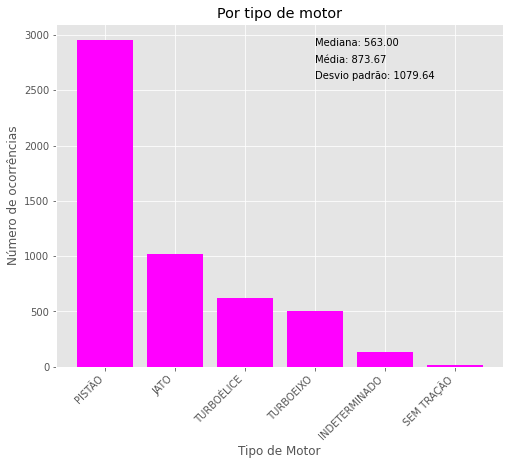

In [175]:
motor = Counter(dados['motor_tipo'])
fase_motor = sorted(motor, key = motor.get, reverse = True)
cont_motor = sorted(list(motor.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(8, 7))

x=fase_motor
y=cont_motor

ax.bar(x, y, color='magenta')

plt.xlabel('Tipo de Motor')
ax.set_xticks(x)
fig.autofmt_xdate(rotation=45)
plt.ylabel("Número de ocorrências")
plt.title('Por tipo de motor')
plt.text(3, 2900.0, 'Mediana: %.2f'%(np.median(np.array(cont_motor))))
plt.text(3, 2750.0, 'Média: %.2f'%(np.mean(np.array(cont_motor))))
plt.text(3, 2600.0, 'Desvio padrão: %.2f'%(static.stdev(cont_motor)))  
plt.show()

Nota-se uma grande incidência de ocorrências no tipo de motor PISTÃO, devido a grande quantidade de aeronaves com este tipo ainda em atividade.

Nota-se um valor muito alto no desvio padrão, sendo ele decorremente da grande diferença de casos do primeiro para os demais. A média e a mediana também são muito altos, decorrente do pequeno número de tipos de motores das aeronaves.

##Por fabricante

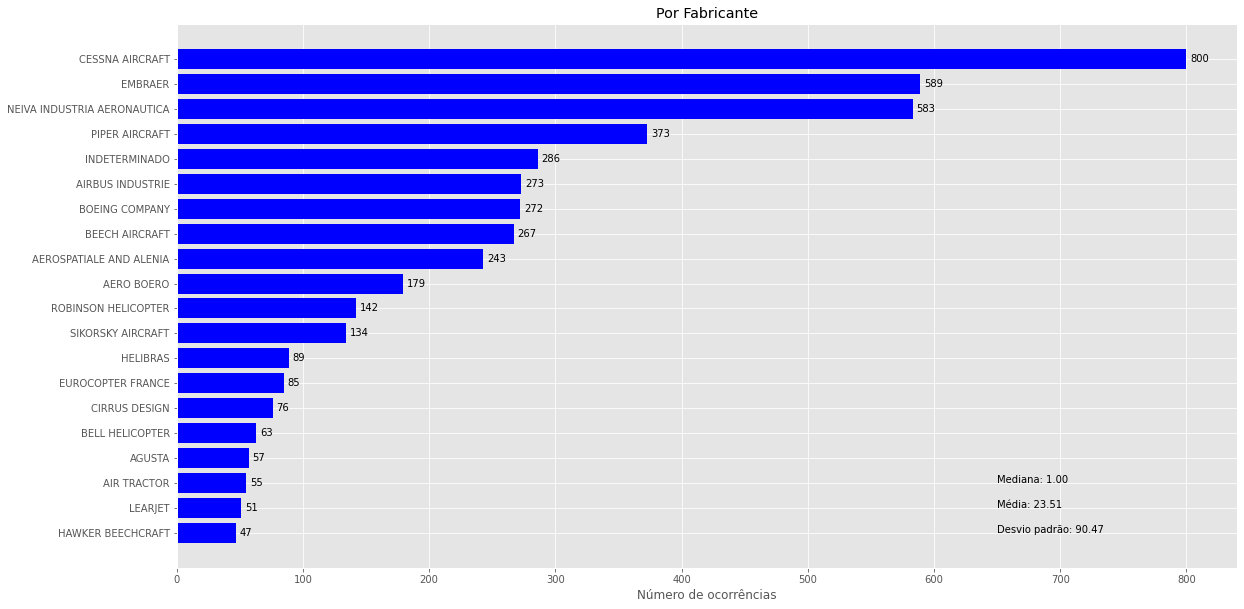

In [142]:
fabricante = Counter(dados['aeronave_fabricante'])
fase_fabricante = sorted(fabricante, key = fabricante.get, reverse = True)
cont_fabricante = sorted(list(fabricante.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(19, 10))

x=fase_fabricante[:20]
y=cont_fabricante[:20]

ax.barh(x, y, color='b')

for i, v in enumerate(y):
    ax.text(v + 3, i, str(v),va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências')

plt.title('Por Fabricante')
plt.text(650, 17, 'Mediana: %.2f'%(np.median(np.array(cont_fabricante))))
plt.text(650, 18, 'Média: %.2f'%(np.mean(np.array(cont_fabricante))))
plt.text(650, 19, 'Desvio padrão: %.2f'%(static.stdev(cont_fabricante)))

plt.show()

Nota-se que grande parte das ocorrências estão contidas nas fabricantes CESSNA AIRCRAFT, EMBRAER e NUEVA INDUSTRIA AERONAUTICA, visto a grande quantidade de aeronaves dessas empresas em atividade.
A média de ocorrências por fabricante corresponde a 23,51.

##Por cidade

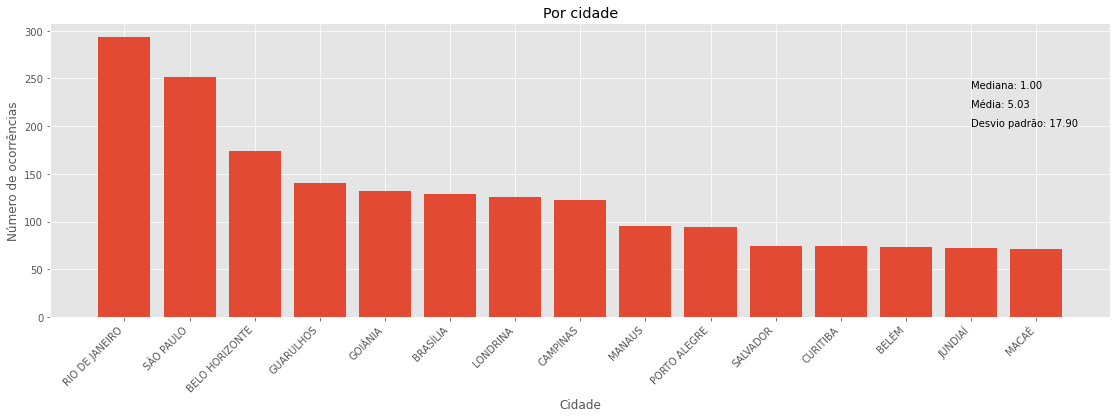

In [143]:
cidade = Counter(dados['cidade'])
fase_cidade = sorted(cidade, key = cidade.get, reverse = True)
cont_cidade = sorted(list(cidade.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(19, 6))

x=fase_cidade[:15]
y=cont_cidade[:15]

rects1=ax.bar(x, y)

plt.xlabel('Cidade')
ax.set_xticks(x)
fig.autofmt_xdate(rotation=45)
plt.ylabel("Número de ocorrências")
plt.title('Por cidade')

plt.text(13, 240.0, 'Mediana: %.2f'%(np.median(np.array(cont_cidade))))
plt.text(13, 220.0, 'Média: %.2f'%(np.mean(np.array(cont_cidade))))
plt.text(13, 200.0, 'Desvio padrão: %.2f'%(static.stdev(cont_cidade)))   

plt.show()

Importante ser verificado que locais como o Rio de Janeiro e São Paulo, dois polos comerciais e turísticos com grande demanda de visitantes no Brasil, possuem uma quantidade de casos superior as demais, pela quantidade de voôs comerciais e turísticos que iniciam e recebem todos os dias.

## Por estado

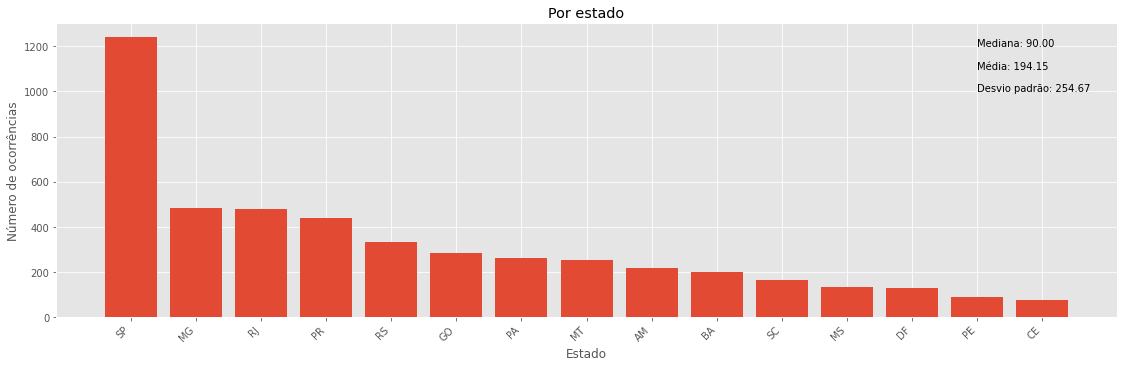

In [157]:
est = Counter(dados['estado'])
fase_est = sorted(est, key = est.get, reverse = True)
cont_est = sorted(list(est.values()), reverse = True)

plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(19, 6))

x=fase_est[:15]
y=cont_est[:15]

rects1=ax.bar(x, y)

plt.xlabel('Estado')
ax.set_xticks(x)
fig.autofmt_xdate(rotation=45)
plt.ylabel("Número de ocorrências")
plt.title('Por estado')

plt.text(13, 1200, 'Mediana: %.2f'%(np.median(np.array(cont_est))))
plt.text(13, 1100, 'Média: %.2f'%(np.mean(np.array(cont_est))))
plt.text(13, 1000, 'Desvio padrão: %.2f'%(static.stdev(cont_est)))   

plt.show()

Nota-se que São Paulo, um dos polos comerciais e com uma grande quantidade de voos privados concentra a maior quantidade de ocorrência do Brasil.
A média de ocorrência é muito grande, muito por conta da quantidade do estado de SP, que é muito elevada.

##Por Tipo


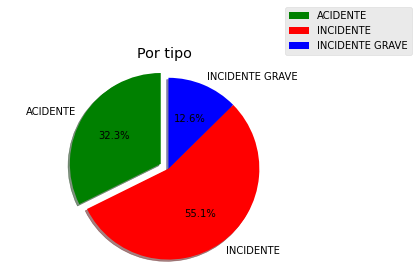

In [155]:
valor = dados['tipo'].value_counts().sort_index()
nome = ['ACIDENTE', 'INCIDENTE', 'INCIDENTE GRAVE']

cores=['green', 'red', 'blue']
# o atributo explode indica que fatia do gráfico será destacada. No exemplo abaixo, será a primeira fatia. A quantidade de valores é igual ao número de fatias do gráfico. 
explode = (0.1, 0, 0)  # explode 1st slice

# Atribuindo um título ao gráfico
plt.title('Por tipo')

plt.pie(valor, explode=explode, labels=nome, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

#Adiciona Legenda
plt.legend(nome, bbox_to_anchor=(1.3, 1.3),loc='upper right')

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()

plt.show()

Os incidentes são os tipos de ocorrência mais comum neste período, com 55,1% do total. Incidentes graves representam cerca de 12,6% e os acidentes, contém uma porcentagem de 32,3% do total.

#Percentual de Investigações Concluídas

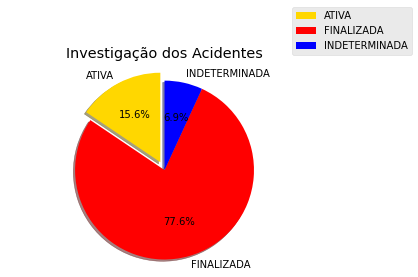

In [52]:
valor = dados['status_investigacao'].value_counts().sort_index()
nome = ['ATIVA', 'FINALIZADA', 'INDETERMINADA']

cores=['gold', 'red', 'blue']
# o atributo explode indica que fatia do gráfico será destacada. No exemplo abaixo, será a primeira fatia. A quantidade de valores é igual ao número de fatias do gráfico. 
explode = (0.1, 0, 0)  # explode 1st slice

# Atribuindo um título ao gráfico
plt.title('Investigação dos Acidentes')

plt.pie(valor, explode=explode, labels=nome, colors=cores, autopct='%1.1f%%', shadow=True, startangle=90)

#Adiciona Legenda
plt.legend(nome, bbox_to_anchor=(1.3, 1.3),loc='upper right')

#Centraliza o gráfico
plt.axis('equal')

#Ajusta o espaçamento para evitar o recorte do rótulo
plt.tight_layout()

plt.show()

Uma importante informação é de que como listado nos dados acima, 77,6% dos incidentes reportados nesse período foram finalizados, o que deve chega a ser uma boa marca, e esperamos que tal dado tenha ajudado na dimunição de casos a cada ano, o que veremos a seguir.

#Tipos de acidentes com investigação por ano

In [193]:
anos = list(set(dados['ano']))
status = list(dados.loc[(dados['status_investigacao']) == 'FINALIZADA', ['ano']]
                         ['ano'])
qtd_finalizacoes_ano = pd.DataFrame({'ano': anos, 'Finalizadas': [status.count(i) for i in anos]})
qtd_finalizacoes_ano = qtd_finalizacoes_ano.sort_values(['Finalizadas'])
soma_fin = qtd_finalizacoes_ano['Finalizadas'].sum()
qtd_finalizacoes_ano.sort_values(['Finalizadas'])

,ano,Finalizadas
0,2016,247
2,2018,254
1,2017,297
3,2019,356
9,2015,373
5,2011,453
4,2010,469
8,2014,470
7,2013,563
6,2012,584


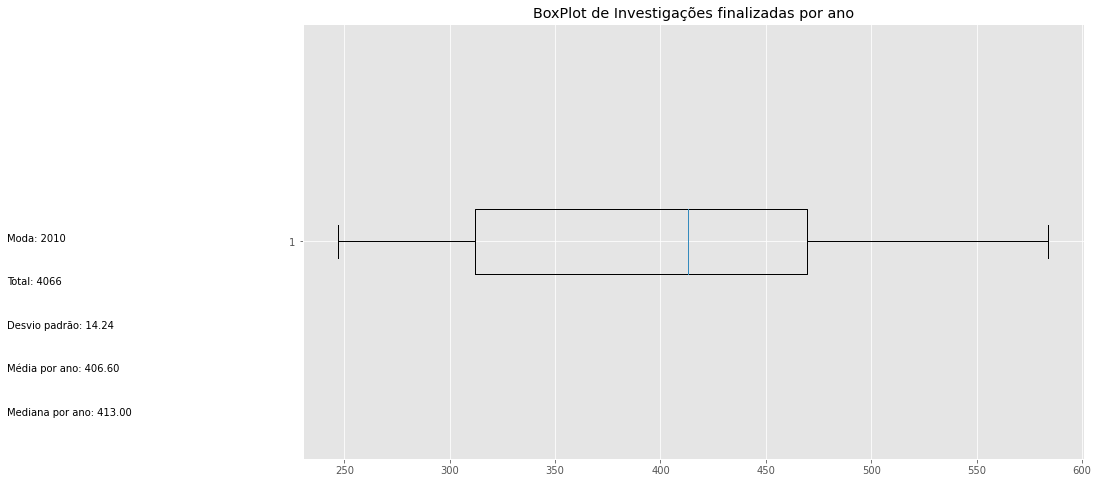

In [180]:
fig,ax = plt.subplots(figsize=(14, 8))

plt.text(90, 0.6, 'Mediana por ano: %.2f'%(np.median(np.array(qtd_finalizacoes_ano['Finalizadas']))))
plt.text(90, 0.7, 'Média por ano: %.2f'%(np.mean(np.array(qtd_finalizacoes_ano['Finalizadas']))))
plt.text(90, 0.8, 'Desvio padrão: %.2f'%(static.stdev(status.count(i) for i in anos)))
plt.text(90, 0.9, 'Total: %d'%(soma_fin))
plt.text(90, 1.0, 'Moda: %d'%(static.mode(status)))
plt.boxplot(qtd_finalizacoes_ano['Finalizadas'], 0, 'rs', 0)
plt.title('BoxPlot de Investigações finalizadas por ano')
plt.show()

Ocorreram ao todo 4066 investigações no período, com uma média de 406 ocorrências por ano.
O menor número de investigações foi em 2016, com 247 finalizações. Já o maior número ocorreu em 2012, com 584 finalizações.

In [194]:
anos = list(set(dados['ano']))
status = list(dados.loc[(dados['status_investigacao']) == 'ATIVA', ['ano']]
                         ['ano'])
qtd_ativas_ano = pd.DataFrame({'ano': anos, 'Ativa': [status.count(i) for i in anos]})
qtd_ativas_ano = qtd_ativas_ano.sort_values(['Ativa'])
soma_ativas = qtd_ativas_ano['Ativa'].sum()
qtd_ativas_ano.sort_values(['Ativa'])

,ano,Ativa
4,2010,28
6,2012,40
9,2015,49
7,2013,53
8,2014,59
5,2011,91
1,2017,104
0,2016,119
3,2019,134
2,2018,139


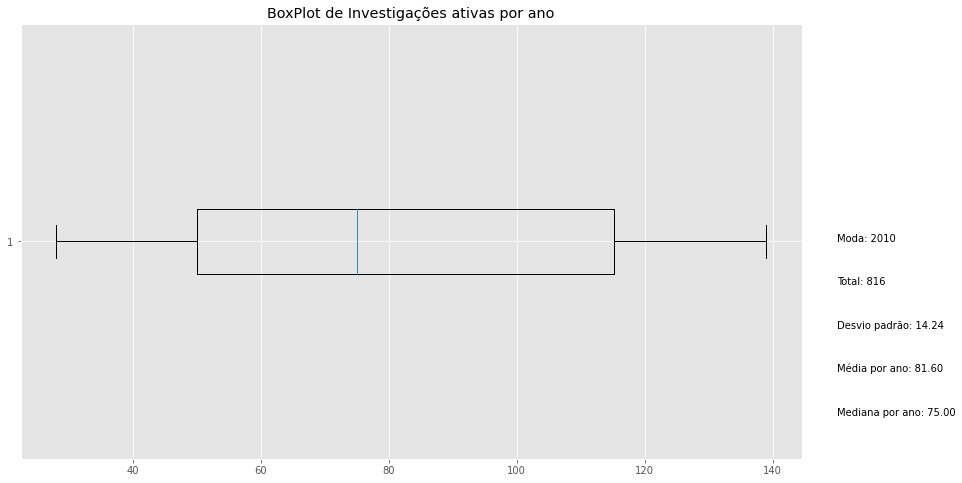

In [181]:
fig,ax = plt.subplots(figsize=(14, 8))

plt.text(150, 0.6, 'Mediana por ano: %.2f'%(np.median(np.array(qtd_ativas_ano['Ativa']))))
plt.text(150, 0.7, 'Média por ano: %.2f'%(np.mean(np.array(qtd_ativas_ano['Ativa']))))
plt.text(150, 0.8, 'Desvio padrão: %.2f'%(static.stdev(status.count(i) for i in anos)))
plt.text(150, 0.9, 'Total: %d'%(soma_ativas))
plt.text(150, 1.0, 'Moda: %d'%(static.mode(status)))
plt.boxplot(qtd_ativas_ano['Ativa'], 0, 'rs', 0)
plt.title('BoxPlot de Investigações ativas por ano')
plt.show()

Ocorreram ao todo 816 investigações no período, com uma média de 82 ocorrências por ano. O menor número de investigações ativas foi em 2010, com 28 investigações. Já o maior número ocorreu em 2018, com 139 investigações.

In [192]:
anos = list(set(dados['ano']))
status = list(dados.loc[(dados['status_investigacao']) == 'INDETERMINADA', ['ano']]
                         ['ano'])
qtd_indeterminada_ano = pd.DataFrame({'ano': anos, 'Indeterminada': [status.count(i) for i in anos]})
qtd_indeterminada_ano = qtd_indeterminada_ano.sort_values(['Indeterminada'])
soma_ind = qtd_indeterminada_ano['Indeterminada'].sum()
qtd_indeterminada_ano.sort_values(['Indeterminada'])

,ano,Indeterminada
3,2019,6
6,2012,23
5,2011,32
1,2017,33
0,2016,37
7,2013,37
8,2014,38
9,2015,49
2,2018,50
4,2010,55


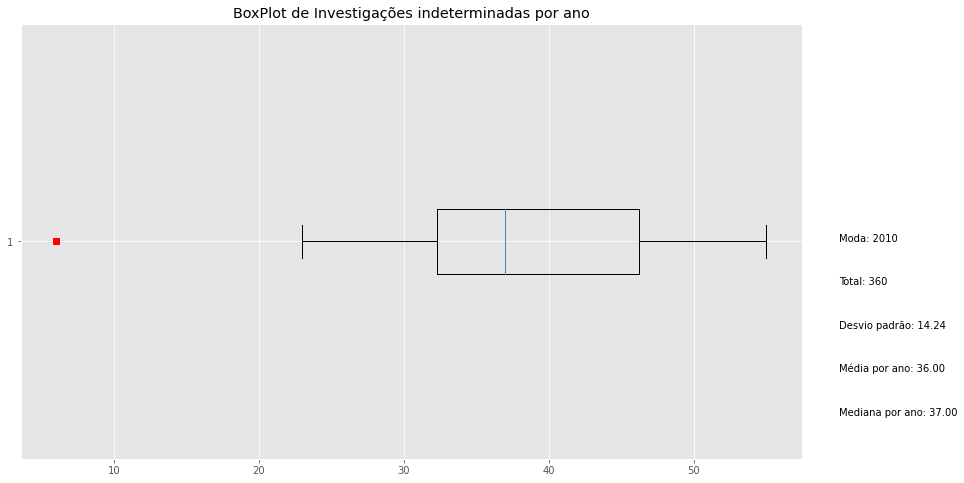

In [182]:
fig,ax = plt.subplots(figsize=(14, 8))

plt.text(60, 0.6, 'Mediana por ano: %.2f'%(np.median(np.array(qtd_indeterminada_ano['Indeterminada']))))
plt.text(60, 0.7, 'Média por ano: %.2f'%(np.mean(np.array(qtd_indeterminada_ano['Indeterminada']))))
plt.text(60, 0.8, 'Desvio padrão: %.2f'%(static.stdev(status.count(i) for i in anos)))
plt.text(60, 0.9, 'Total: %d'%(soma_ind))
plt.text(60, 1.0, 'Moda: %d'%(static.mode(status)))
plt.boxplot(qtd_indeterminada_ano['Indeterminada'], 0, 'rs', 0)
plt.title('BoxPlot de Investigações indeterminadas por ano')
plt.show()

Ocorreram ao todo 360 investigações no período, com uma média de 36 ocorrências por ano. O menor número de investigações indeterminadas foi em 2019, com 6 investigações. Já o maior número ocorreu em 2010, com 55 investigações.

#Investigações por Ano

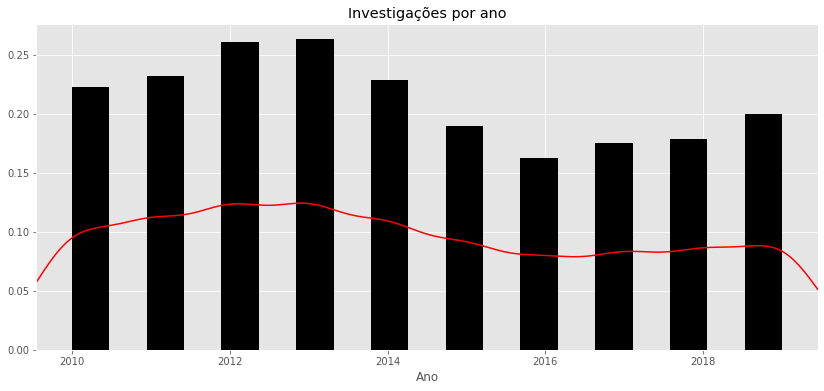

In [195]:
investigacoes_por_ano = Counter(dados['ano'])
ano = list(investigacoes_por_ano.keys())
inv_ano = list(investigacoes_por_ano.values())
plt.style.use("ggplot")
fig,ax = plt.subplots(figsize=(14, 6))
x= dados.ano
plt.hist(x, density=True, bins= 19, color='black')
mn, mx = plt.xlim()
plt.xlim(mn, mx)
kde_xs = np.linspace(mn, mx, 301)
kde = st.gaussian_kde(x)
plt.plot(kde_xs, kde.pdf(kde_xs), color='r')
plt.xlabel('Ano')
plt.title('Investigações por ano')
plt.show()

2013 e 2016 foram os anos de maior e menor ocorrências, respectivamente.
A média é de 524 ocorrências por ano.
Nota-se uma alta nas ocorrências, visto que desde 2017, as ocorrências só aumentam.

# Regressão Linear - Número de assentos


In [186]:
dataframe = pd.DataFrame()
dataframe['x'] = dados['ano']
dataframe['y'] = dados['aeronave_assentos']
x_values = dataframe[['x']]
y_values = dataframe[['y']]

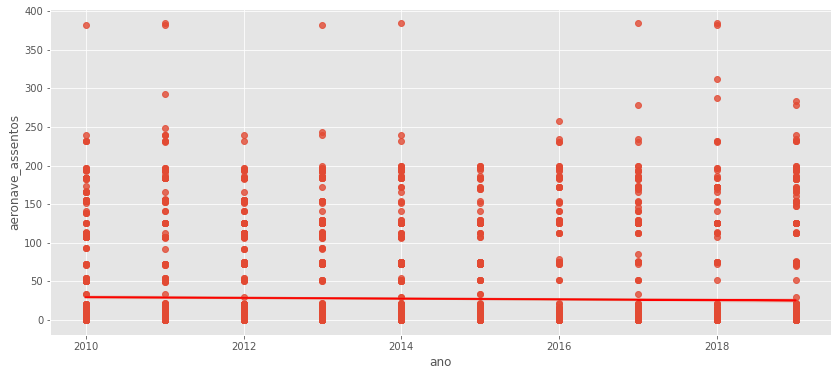

In [188]:
plt.figure(figsize=(14,6))
sns.regplot(x='ano', y='aeronave_assentos', data=dados)
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)
plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'r')
plt.show()

O gráfico representa o eixo X com o ano do acidente com aeronaves, já o eixo Y do gráfico representa a quantidade de assentos destas aeronaves. Pode se notar que a maior parte dos acidentes ocorrem com um número de assentos até 200 passageiros.

Analisando a linha nota-se uma frequencia maiorde acidentes em aeronaves de pequeno e médio porte.








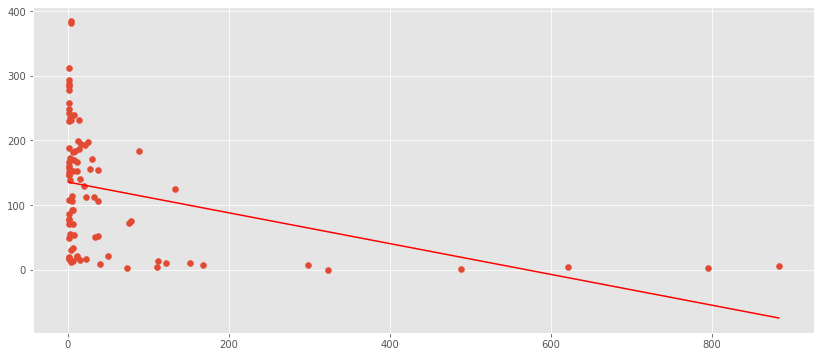

In [190]:
assentos = Counter(dados['aeronave_assentos'])
fase_assentos = sorted(assentos, key = assentos.get, reverse = True)
cont_assentos = sorted(list(assentos.values()), reverse = True)
dataframe = pd.DataFrame()
dataframe['y'] = fase_assentos
dataframe['x'] = cont_assentos
x_values = dataframe[['x']]
y_values = dataframe[['y']]
plt.figure(figsize=(14,6))
plt.scatter(dataframe['x'].values, dataframe['y'].values)
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)
plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'r')
plt.show()

O eixo X representa a quantidade de ocorrências de acidentes, e o eixo Y do gráfico representa a quantidade de assentos.

Verificando os pontos apresentados, nota-se que a grande maioria das ocorrências ocorre com aeronaves de poucos assentos.

Reavaliar o protocolo de segurança de aeronaves de pequeno porte, acompanhar e ter um maior controle sobre as regras e leis que seguem as aeronaves de grande porte pode ser um fator crucial como medida para melhoria no problema representado pelo gráfico acima (**BBC**, 2021). 

De forma ilustrativa, o gráfico apresenta melhora nítida nos casos de ocorrências referente aos assentos.

# Relatório Final

O trabalho apresenta, de forma gráfica, informações envolvendo a aviação brasileira entre os anos de 2010 a 2019. Utiliza-se majoritariamente de dados recuperados do arquivo de ocorrências da CENIPA.

Analisando os dados coletados, observa-se que os incidentes são de números e aeronaves diversas sem descriminação entre o ocorrido. 
Dentro dessa análise, percebe-se que as investigações realizadas sobre estas ocorrências teve finalidade, sendo o maior número de ocorrências registradas pelo CENIPA no ano de 2013 e o menor em 2016. 
Por fim conseguimos estabelecer algumas características nos incidentes, sendo eles: os fatores que causaram o incidente/incidente grave/acidente, a média de incidentes por ano, cidade, horários, tipos de aeronaves e o nível de dano causado. 
A ocorrência que mais se apresenta é a falha do motor durante o voo, opondo-se a colisão com objetos durante a decolagem e o pouso que apresentaram os menores dados.

# Bibliotecas utilizadas

**NumPy**

NumPy é usada principalmente para realizar cálculos em Arrays Multidimensionais. O NumPy fornece um grande conjunto de funções e operações de biblioteca que ajudam os programadores a executar facilmente cálculos numéricos (**MEDIUM**, 2018).

**Pandas**

A biblioteca Pandas é utilizada para análise de dados. O Pandas vem com um conjunto de opções e configurações alteráveis pelo usuário. Eles podem aumentar muito a produtividade, pois permitem que você personalize o ambiente do Pandas exatamente de acordo com suas preferências. EX: alterar algumas das configurações de exibição do Pandas para alterar quantas linhas e colunas são mostradas e com que precisão os números de ponto flutuante são exibidos (**VOITTO**, 2021)

**Matplotlib**

Matplotlib é uma biblioteca para criação de gráficos e visualização de dados em geral e foi feita para a linguagem de programação Python. Além disso, ele oferece uma interface de programação orientada a objetos para incluir gráficos através de toolkits de interface gráfica como o Tkinter, Wxpython, Qt ou GTK (**MEDIUM**, 2020). 

**Seaborn**

A biblioteca Seaborn trabalha em cima do matplotlib e ajuda a melhorar o visual dos gráficos, dando uma aparência mais bem acabada (**VOOOO**, 2017).

**Scipy/scipy.stats**

O SciPy é o pacote principal de rotinas científicas em Python, que se destina a operar de forma eficiente em matrizes numpy, de modo que numpy e scipy trabalhem lado a lado. scipy contém várias ferramentas dedicadas a problemas comuns em computação científica. Seus diferentes sub-módulos correspondem a diferentes aplicações, tais como interpolação, integração, otimização, processamento de imagens, estatísticas, funções especiais, etc (**UFPR**, ?).

**Collections counter**

Um Counter é uma subclasse de dict subclass para contagem de objetos hasheáveis. É uma coleção na qual elementos são armazenados como chaves de dicionário e suas contagens são armazenadas como valores de dicionário. Contagens podem ser qualquer valor inteiro incluindo zero e contagens negativas. A classe Counter é similar a sacos ou multiconjuntos em outras linguagens (**PYTHON**, ?)

# Bibliografia

CENIPA, **FCA 58-1 Ocorrências Aeronáuticas**: Panorama Estatístico da Aviação Brasileira. 118p. Centro de Investigações 
e Prevenção de Acidentes Aeronáuticos. 2016.

CHOUDHARY, Jayvant; OHRI, Anurag; KUMAR, Brind. **Identification of Road Accidents Hot Spots in Varanasi using 
QGIS**. Proceedings of National Conference on Open Source GIS: Opportunities and Challenges Department of Civil Engineering, IIT(BHU), 2015. 

EMC. **Data Science and Big Data Analytics: Discovering, Analyzing, Visualizing and Presenting Data.** Wiley, EMC Education Services, 1st Edition, 2015, 399 p.

GRUS, Joel. **Data Science from Scratch: First Principles with Python.** O'Reilly Media, Inc., 1st ed., 2015, 330 p.

WAGNER, Michael; LLORT, Gérman; MERCADAL, Estanislao;GIMÉNEZ, Judit; LABARTA, Jesús. **Performance Analysis 
of Parallel Python Applications.** Proceeding of International Conference on Computational Science, ICCS. 2017.

Acervo Lima, **Importação de Arquivo CSV com GitHub**. [S.I.], 2022. Disponível em: https://acervolima.com/maneiras-de-importar-arquivos-csv-no-google-colab/. Acesso em 12 de maio. 2022

COUTINHO, Thiago. **O que é a biblioteca Pandas?**. Voitto,[S.I.], 2021.Disponível em:https://www.voitto.com.br/blog/artigo/biblioteca-pandas. Acesso em: 12 de maio. 2022

JUNIOR, Luiz S.. **Entendendo a biblioteca NumPy**. Medium, [S.I.], 2018.Disponível em:https://medium.com/ensina-ai/entendendo-a-biblioteca-numpy-4858fde63355. Acesso em: 20 de maio. 2022

UFPR. **4. SciPy**. [S.I.]. [?]. Disponível em:http://www.estruturas.ufpr.br/disciplinas/pos-graduacao/introducao-a-computacao-cientifica-com-python/introducao-python/capitulo-4-scipy. Acesso em: Acesso em: 20 de maio. 2022

MACHADO, Alysson. **Biblioteca Matplotlib do Python**. Medium, 2020.Disponível em:https://medium.com/@alyssonmachado388/biblioteca-matplotlib-do-python-5e32104439d0. Acesso em: Acesso em: 20 de maio. 2022

Acervo Lima, **Boxplot com Matplotlib**. [S.I.], 2020. Disponível em: https://www.acervolima.com.br/2020/04/boxplot-com-matplotlib.html. Acesso em 20 de maio. 2022

Vaz, Marco, **Pacote MatPlotLib - Gráficos**. [S.I.]. [?]. Disponível em: https://www.codingame.com/playgrounds/52723/programacao-python-parte-3---prof--marco-vaz/pacote-matplotlib-graficos. Acesso em 20 de maio. 2022